In [63]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)

from bsmodel import BSModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
import matplotlib as mpl
from klhr import KLHR
from sinh_klhr import SINHKLHR
from sinh_distribution import SinhArcsinhDistribution

In [64]:
homedir = "/mnt/c/Users/jccer/" # "/Users/edward/" # 

In [65]:
bs.set_bridgestan_path(homedir + "bridgestan")

In [66]:
bs_model = BSModel(stan_file = homedir + "mcmcexperiments/stan/funnel.stan",
                   data_file = homedir + "mcmcexperiments/stan/funnel.json")

In [67]:
x = np.linspace(-20, 20, 301)
x2 = np.linspace(-15, 15, 301)
y = np.linspace(-20, 20, 301)

In [68]:
z = np.zeros(2)
Z = np.zeros((301, 301))
for ix, xn in enumerate(x):
    for iy, yn in enumerate(y):
        z[0] = xn
        z[1] = yn
        Z[ix, iy] = bs_model.log_density(z)

In [69]:
def random_direction(rng):
    x = pt
    return x / np.linalg.norm(x)

def to_line(rho, x, o):
    return x.reshape(-1) * rho + o

def rotation_matrix(theta):
    s = np.sin(theta)
    c = np.cos(theta)
    return np.array([[c, -s], [s, c]])

In [70]:
rng = np.random.default_rng()

In [118]:
cols = list(mpl.colors.BASE_COLORS.keys())
pt = np.zeros(2)
pt[0] = rng.normal() * 3
pt[1] = rng.normal() * np.exp(0.5 * pt[0])
rho = random_direction(rng)
r = rotation_matrix(30)

In [119]:
sinhklhr = SINHKLHR(bs_model, theta = pt)
klhr = KLHR(bs_model, theta = pt)

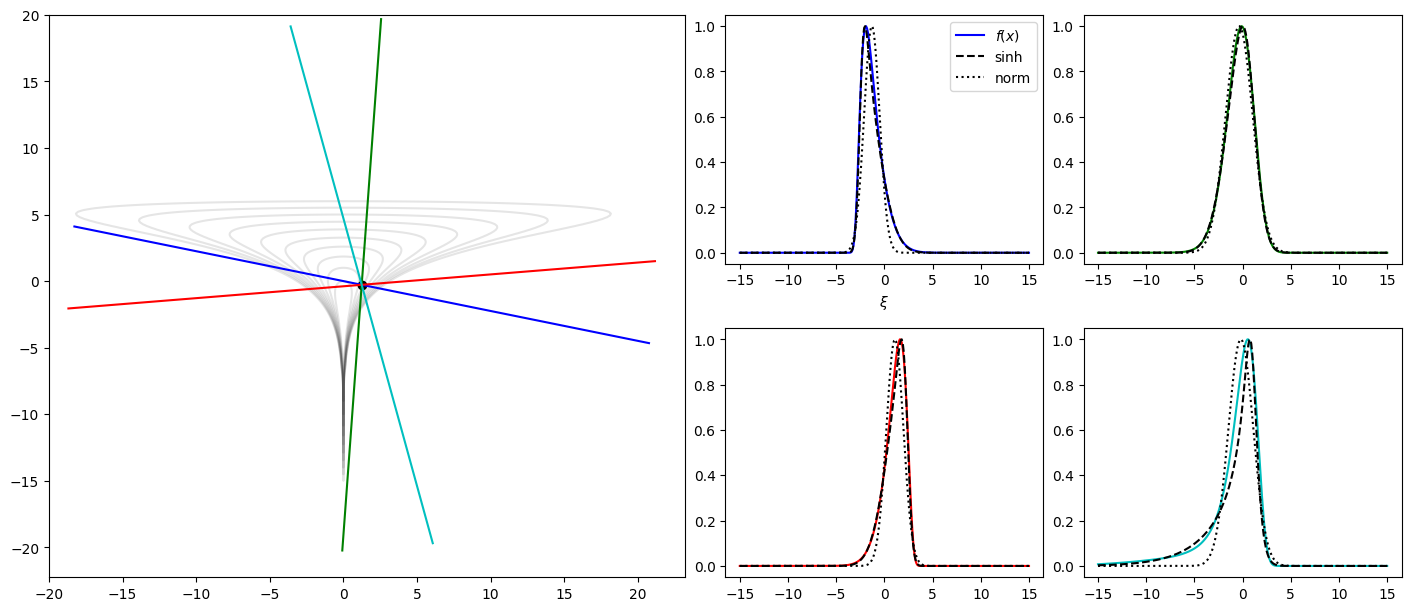

In [120]:
fig = plt.figure(layout = "constrained", figsize = (14, 6))
gs = GridSpec(2, 4, figure = fig)
ax1 = fig.add_subplot(gs[:, :2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[1, 3])

pos = ax1.contour(x, y, Z, levels = np.linspace(-5, 0, 10), colors = "black", linestyles = "solid", alpha = 0.1)
ax1.scatter(pt[0], pt[1], color = "black")
for idx in range(4):
    line = np.array([to_line(rho, xn, pt) for xn in x])
    fx = np.array([np.exp(bs_model.log_density(ln)) for ln in line])
    fx /= np.max(fx)
    eta = sinhklhr.fit(rho)
    eta = sinhklhr._unpack(eta)
    SinhArcsinh = SinhArcsinhDistribution(*eta)
    qx = SinhArcsinh.pdf(x)
    qx /= np.max(qx)
    zeta = klhr.fit(rho)
    zeta = klhr._unpack(zeta)
    Normal = norm(*zeta) 
    px = Normal.pdf(x)
    px /= np.max(px)
    ax1.plot(line[:, 0], line[:, 1], color = cols[idx])
    rho = r @ rho

    if idx == 0:
        ax2.plot(x2, fx, color = cols[0], label = r"$f(x)$")
        ax2.plot(x2, qx, color = "black", linestyle = "dashed", label = "sinh")
        ax2.plot(x2, px, color = "black", linestyle = "dotted", label = "norm")
        ax2.set_xlabel(r"$\xi$")
        ax2.legend()

    if idx == 1:
        ax3.plot(x2, fx, color = cols[1])
        ax3.plot(x2, qx, color = "black", linestyle = "dashed")
        ax3.plot(x2, px, color = "black", linestyle = "dotted", label = "norm")

    if idx == 2:
        ax4.plot(x2, fx, color = cols[2])
        ax4.plot(x2, qx, color = "black", linestyle = "dashed")
        ax4.plot(x2, px, color = "black", linestyle = "dotted", label = "norm")

    if idx == 3:
        ax5.plot(x2, fx, color = cols[3])
        ax5.plot(x2, qx, color = "black", linestyle = "dashed")
        ax5.plot(x2, px, color = "black", linestyle = "dotted", label = "norm")